<a href="https://colab.research.google.com/github/Loganath399/Computer-Vision-with-OpenCV-for-Modern-AI/blob/main/activity_3_(13_02_2026).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-contrib-python


In [2]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow



In [6]:
print("Upload FIRST image (object close)")
uploaded1 = files.upload()
img1_path = list(uploaded1.keys())[0]

print("Upload SECOND image (object far / rotated)")
uploaded2 = files.upload()
img2_path = list(uploaded2.keys())[0]

# Read images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

Upload FIRST image (object close)


Saving exp2.png to exp2.png
Upload SECOND image (object far / rotated)


Saving exp3.png to exp3.png


In [7]:
sift = cv2.SIFT_create()

# Detect keypoints & descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)


Number of Good Matches: 12


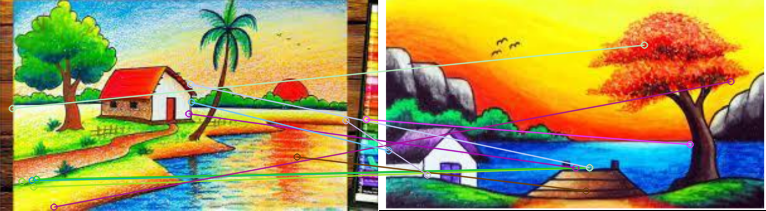

In [8]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print("Number of Good Matches:", len(good_matches))

# Draw matches
matched_img = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

cv2_imshow(matched_img)
